# Phishing Domain Detection

## Author Details

- **Name**: Siddharth Lal Deo
- **Email**: siddharthlaldeo@gmail.com
- **Website/Blog**: siddharthdeo.vercel.app
- **GitHub**: https://github.com/siddharthdeo99
- **LinkedIn**: https://www.linkedin.com/in/siddharth-lal-deo/

Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Ineuron_phishing_domain_detection

/content/drive/MyDrive/Ineuron_phishing_domain_detection


Import Basic Library Files To Get Started.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Download the dataset from Mendeley :``` https://data.mendeley.com/datasets/72ptz43s9v/1```

In [2]:
!curl "https://data.mendeley.com/public-files/datasets/72ptz43s9v/files/26197eb8-15bc-4e06-a269-aa10ddc286f0/file_downloaded"

Found. Redirecting to https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/0a985721-d1d0-42d9-96ba-dc920b52b009

In [3]:
!curl "https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/0a985721-d1d0-42d9-96ba-dc920b52b009" -o data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.9M  100 23.9M    0     0   376k      0  0:01:04  0:01:04 --:--:-- 945859      0  0:27:57  0:00:01  0:27:56 14984  0:00:58  0:00:10  0:00:48  456k0     0   434k      0  0:00:56  0:00:24  0:00:32  453k   0  0:00:59  0:00:40  0:00:19  387k


In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_url,88647.0,2.191343,1.235636,1.0,2.0,2.0,2.0,24.0
qty_hyphen_url,88647.0,0.328810,1.119286,0.0,0.0,0.0,0.0,35.0
qty_underline_url,88647.0,0.113879,0.657767,0.0,0.0,0.0,0.0,21.0
qty_slash_url,88647.0,1.281781,1.893929,0.0,0.0,0.0,2.0,44.0
qty_questionmark_url,88647.0,0.009329,0.112568,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...
qty_redirects,88647.0,0.343903,0.783892,-1.0,0.0,0.0,1.0,17.0
url_google_index,88647.0,0.001410,0.058640,-1.0,0.0,0.0,0.0,1.0
domain_google_index,88647.0,0.002019,0.063250,-1.0,0.0,0.0,0.0,1.0
url_shortened,88647.0,0.005482,0.073841,0.0,0.0,0.0,0.0,1.0


# Handling Missing Values

Null values

In [8]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

Remove Duplicated values

In [9]:
df.drop_duplicates(inplace=True)
#Remember that when using inplace=True, the method modifies the original DataFrame, and no new DataFrame is returned.

In [10]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


## Data Visualization

In [11]:
#lets visualize the phising column
print("Count of 1 :", df.phishing.sum())
print("Count of 0 :", df.shape[0]-df.phishing.sum())

Count of 1 : 30497
Count of 0 : 56712


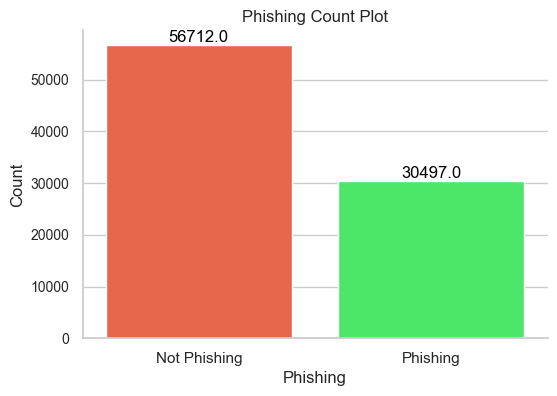

In [12]:
custom_palette = ['#FF5733', '#33FF57']

# Create the count plot with styling
sns.set(style='whitegrid')  # Set the background style
plt.figure(figsize=(6, 4))  # Set the figure size
ax = sns.countplot(data=df, x='phishing', palette=custom_palette)  # Create the count plot
plt.xlabel('Phishing')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Phishing Count Plot')  # Set the plot title
plt.xticks([0, 1], ['Not Phishing', 'Phishing'])  # Set custom x-ticks labels
plt.yticks(fontsize=10)  # Set the font size for y-axis labels
sns.despine()  # Remove the top and right spines

# Annotate the bars with count values
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height() + 0.2),
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

## Split Features and labels
## Feature Selection
1. Dropping Constant Features
2. Removing Highly Correlated Features

In [13]:
X = df.drop(columns=["phishing"])
y = df.phishing

VarianceThreshold from scikit-learn to remove features with low variance. <br>
Features with low variance are likely to contain less useful information and can be removed to simplify the dataset.

In [14]:
#Dropping Constant Features
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0)
var.fit(X)

print("Total Columns :",len(var.get_support()))
print("Columns Dropped :",len(var.get_support()) - sum(var.get_support()))

X_new = X[X.columns[var.get_support()]]

print("Columns Left :",len(X_new.columns))

Total Columns : 111
Columns Dropped : 13
Columns Left : 98


In [15]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr
corr_features = correlation(X, .6)
sum(var.get_support()) - len(corr_features)
X_new = X.drop(corr_features, axis=1)

print("Number of Column Dropped", len(X.columns) - len(X_new.columns) )

X = X_new
print("Columns Left :",len(X_new.columns))

Number of Column Dropped 57
Columns Left : 54


In [16]:
X_new.head(3)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,3,0,0,1,0,0,0,0,0,0,...,-1,1,2,0,892,0,0,0,0,0
1,5,0,1,3,0,3,0,0,0,0,...,150,1,2,1,9540,1,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,-1,1,2,3,589,1,0,0,0,0


``` mutual_info_classif``` is used for feature selection in classification tasks based on mutual information. Mutual information measures the amount of information shared between a target variable and a feature, which can be useful for determining how informative a feature is for predicting the target class.

In [17]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information for each feature
mi_scores = mutual_info_classif(X, y)

# Print mutual information scores for each feature
for feature, mi_score in zip(X.columns, mi_scores):
    print(f"{feature}: {mi_score}")

qty_dot_url: 0.05710576722641747
qty_hyphen_url: 0.04990700022318695
qty_underline_url: 0.03740464774665209
qty_slash_url: 0.37490145566442945
qty_questionmark_url: 0.006911215157314743
qty_equal_url: 0.062248733751002705
qty_at_url: 0.019960425791011094
qty_exclamation_url: 0.0003888559326876706
qty_space_url: 0.0
qty_tilde_url: 0.0035302517533191136
qty_comma_url: 0.0
qty_plus_url: 0.0
qty_asterisk_url: 0.0
qty_hashtag_url: 0.0005198662944294608
qty_dollar_url: 0.0
qty_percent_url: 0.010250505973750546
qty_tld_url: 0.03862205445031375
qty_dot_domain: 0.07069725157791185
qty_hyphen_domain: 0.005975384347679302
qty_underline_domain: 8.329253755334776e-05
qty_slash_domain: 0.001017539426076297
qty_questionmark_domain: 0.0
qty_equal_domain: 0.0017742038126642434
qty_at_domain: 0.0
qty_and_domain: 9.980454254931992e-05
qty_exclamation_domain: 0.00042304529096659493
qty_space_domain: 0.0
qty_tilde_domain: 0.0012257495662559847
qty_comma_domain: 0.0015088667831391067
qty_plus_domain: 0.0023

In [18]:
mutual_info = pd.Series(mi_scores)
mutual_info.index = X.columns
mutual_info = mutual_info.sort_values(ascending=False)

In [19]:
mutual_info

qty_slash_url              0.374901
time_domain_activation     0.222585
asn_ip                     0.166652
ttl_hostname               0.094806
qty_percent_params         0.072162
qty_hyphen_params          0.071140
qty_slash_params           0.071123
qty_dot_domain             0.070697
qty_equal_url              0.062249
qty_dot_url                0.057106
time_domain_expiration     0.056159
qty_hyphen_url             0.049907
qty_tld_url                0.038622
qty_underline_url          0.037405
qty_at_url                 0.019960
qty_mx_servers             0.018362
qty_vowels_domain          0.015975
domain_spf                 0.015691
qty_nameservers            0.015306
qty_redirects              0.013550
qty_ip_resolved            0.013165
qty_percent_url            0.010251
time_response              0.008841
tls_ssl_certificate        0.007597
qty_questionmark_url       0.006911
qty_hyphen_domain          0.005975
url_shortened              0.004284
qty_tilde_url              0

In [20]:
mutual_info = mutual_info[mutual_info > 0]

In [21]:
X = X[mutual_info.index]

In [22]:
X.head(3)

,qty_slash_url,time_domain_activation,asn_ip,ttl_hostname,qty_percent_params,qty_hyphen_params,qty_slash_params,qty_dot_domain,qty_equal_url,qty_dot_url,...,qty_equal_domain,qty_comma_domain,qty_tilde_domain,qty_slash_domain,url_google_index,qty_hashtag_url,qty_exclamation_domain,qty_exclamation_url,qty_and_domain,qty_underline_domain
0,1,-1,60781,892,-1,-1,-1,2,0,3,...,0,0,0,0,0,0,0,0,0,0
1,3,579,36024,9540,0,0,0,2,3,5,...,0,0,0,0,0,0,0,0,0,0
2,1,-1,4766,589,-1,-1,-1,2,0,2,...,0,0,0,0,0,0,0,0,0,0


In [23]:
len(mutual_info)

40

In [24]:
X.columns

Index(['qty_slash_url', 'time_domain_activation', 'asn_ip', 'ttl_hostname',
       'qty_percent_params', 'qty_hyphen_params', 'qty_slash_params',
       'qty_dot_domain', 'qty_equal_url', 'qty_dot_url',
       'time_domain_expiration', 'qty_hyphen_url', 'qty_tld_url',
       'qty_underline_url', 'qty_at_url', 'qty_mx_servers',
       'qty_vowels_domain', 'domain_spf', 'qty_nameservers', 'qty_redirects',
       'qty_ip_resolved', 'qty_percent_url', 'time_response',
       'tls_ssl_certificate', 'qty_questionmark_url', 'qty_hyphen_domain',
       'url_shortened', 'qty_tilde_url', 'qty_plus_domain', 'domain_in_ip',
       'qty_equal_domain', 'qty_comma_domain', 'qty_tilde_domain',
       'qty_slash_domain', 'url_google_index', 'qty_hashtag_url',
       'qty_exclamation_domain', 'qty_exclamation_url', 'qty_and_domain',
       'qty_underline_domain'],
      dtype='object')

These are the final 43 selected columns.

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

## Model Training with Random Forest Classifier

ValidationCurve visualization from Yellowbrick, a Python library for machine learning visualizations, to explore the effect of the max_depth hyperparameter on the performance of a RandomForestClassifier. The ValidationCurve visualizer helps in understanding how the model's performance varies with different values of a specified hyperparameter.

Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. Ex - In ANN, size of neural network

In [27]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.6 MB/s eta 0:00:00a 0:00:01


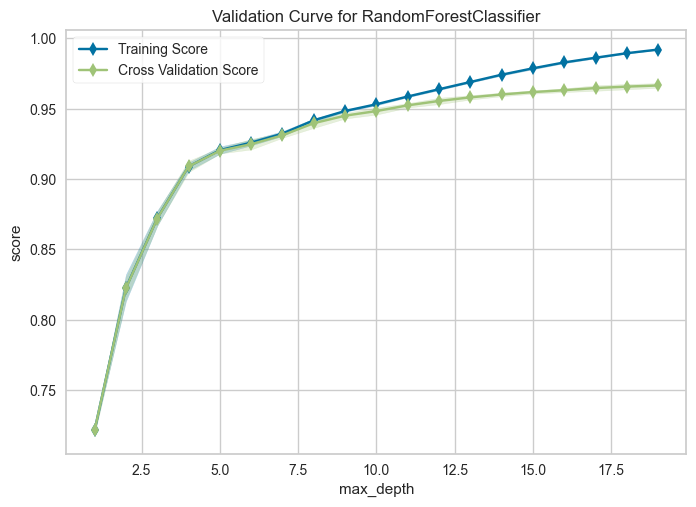

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [28]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import RandomForestClassifier

viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(1, 20), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

```Max_depth represents the maximum depth of the trees in the random forest.```

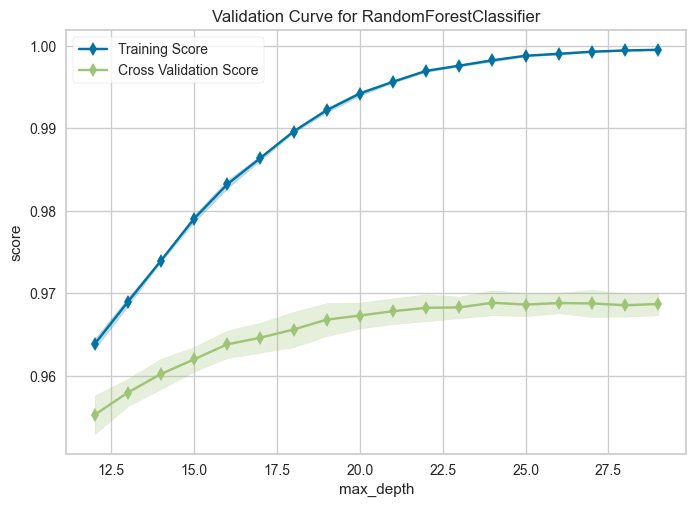

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [29]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(12, 30), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

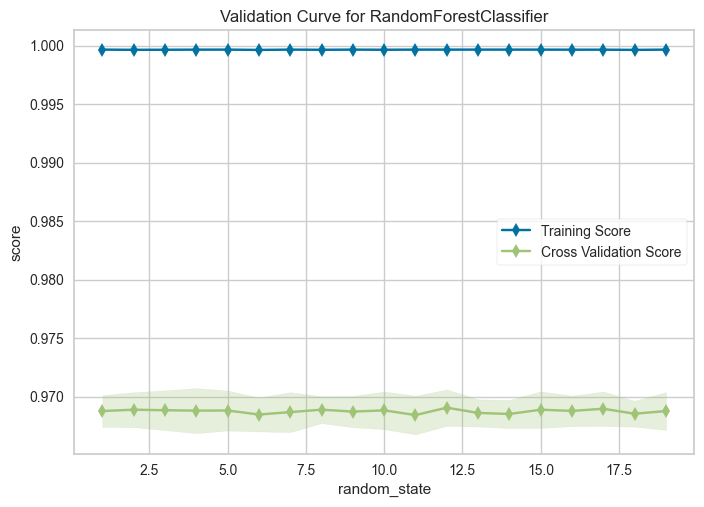

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='random_state', ylabel='score'>

In [30]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    RandomForestClassifier(), param_name="random_state",
    param_range=np.arange(1, 20), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

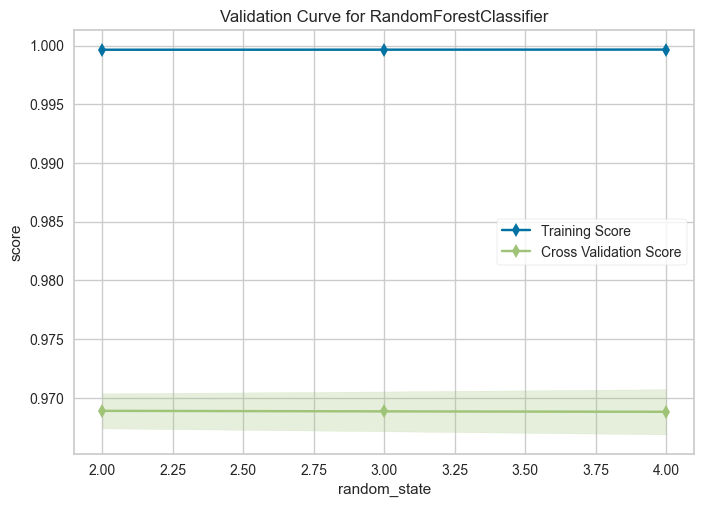

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='random_state', ylabel='score'>

In [31]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="random_state",
    param_range=np.arange(2, 5), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

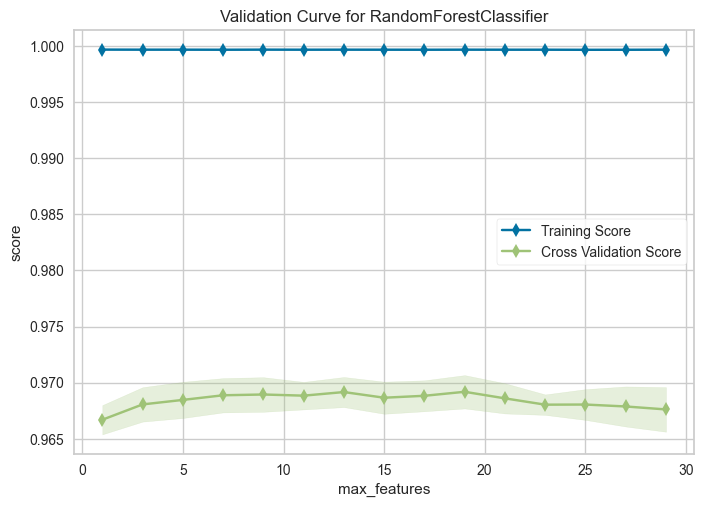

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_features', ylabel='score'>

In [32]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_features",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

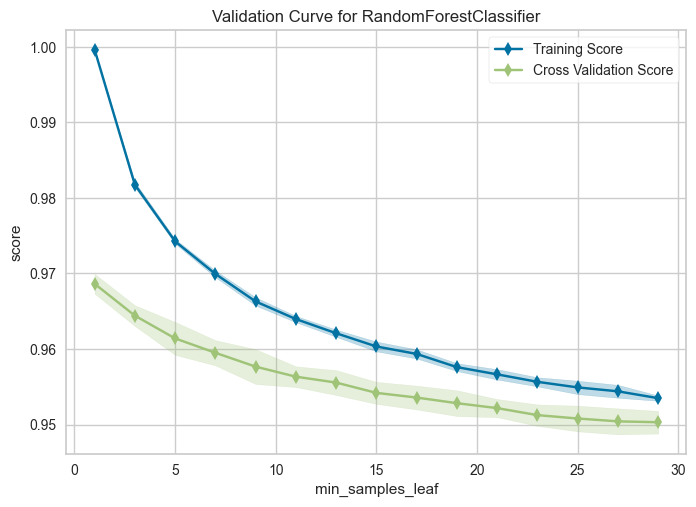

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_leaf', ylabel='score'>

In [33]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="min_samples_leaf",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

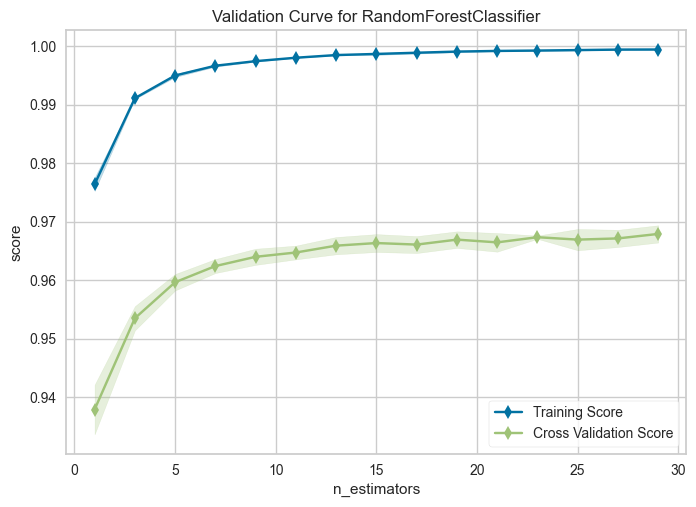

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>

In [34]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_estimators",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

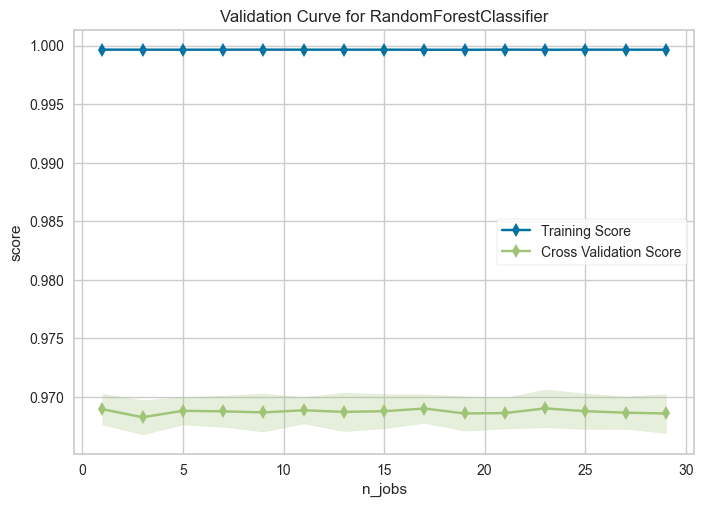

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_jobs', ylabel='score'>

In [35]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_jobs",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(max_depth=23, random_state=3, max_features=8, n_jobs=8, n_estimators=25)
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9661906251085861

# Important Features

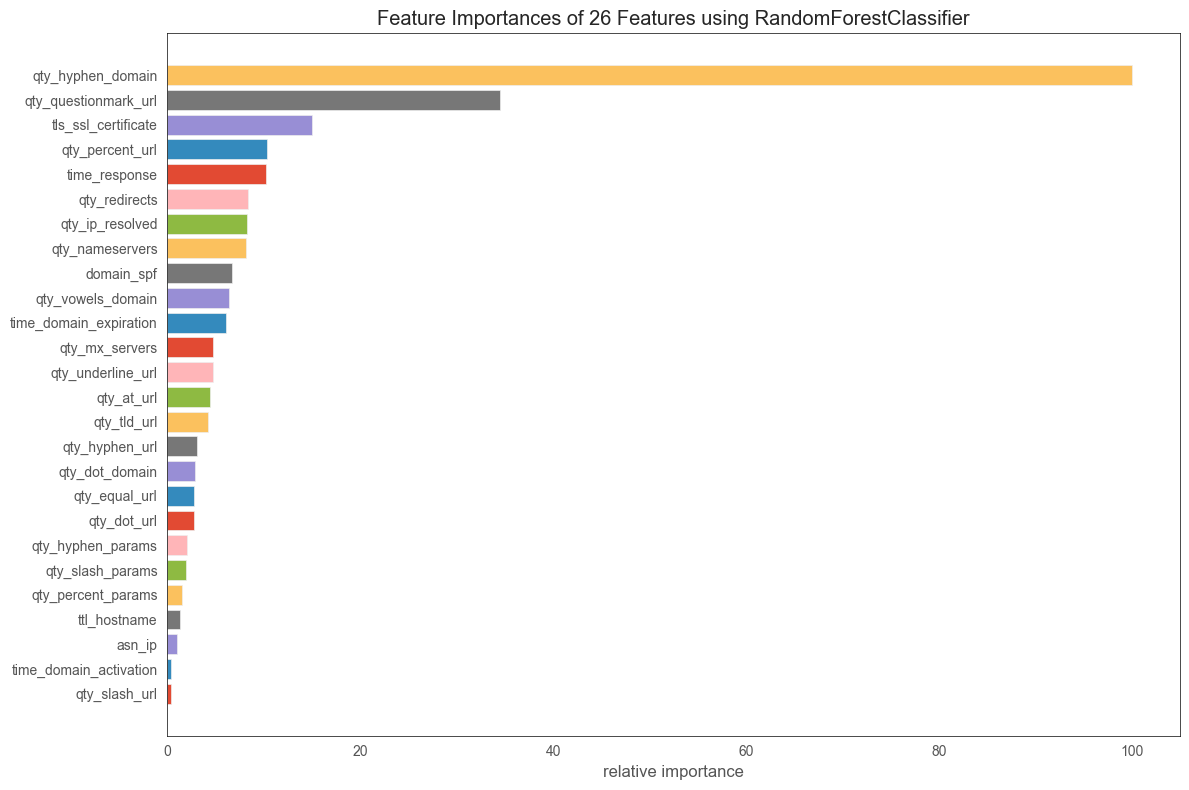

<Axes: title={'center': 'Feature Importances of 26 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [60]:
import matplotlib.pyplot as plt
from yellowbrick.model_selection import FeatureImportances

# Assuming you already have the `rfc` model, `X`, and `y` data loaded.

# Increase the figure size and set a nice background color
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.facecolor'] = 'white'

# Create the FeatureImportances visualization with your RandomForestClassifier
viz = FeatureImportances(rfc, labels=X.columns)

# Fit the visualization on the data
viz.fit(X, y)

# Set properties for the feature importance bars
viz.poof(
    outpath=None,
    clear_figure=True,
    xrot=45,
    fontsize=12,
    title="Feature Importances",
    title_fontsize=16,
    show=False,
)
viz.show()



In [39]:
len(viz.features_)

26

In [40]:
X_train = X_train[viz.features_]
X_test = X_test[viz.features_]

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(max_depth=23, random_state=3)
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9674067896730255

Class Prediction Error

In [42]:
import warnings
warnings.simplefilter("ignore")

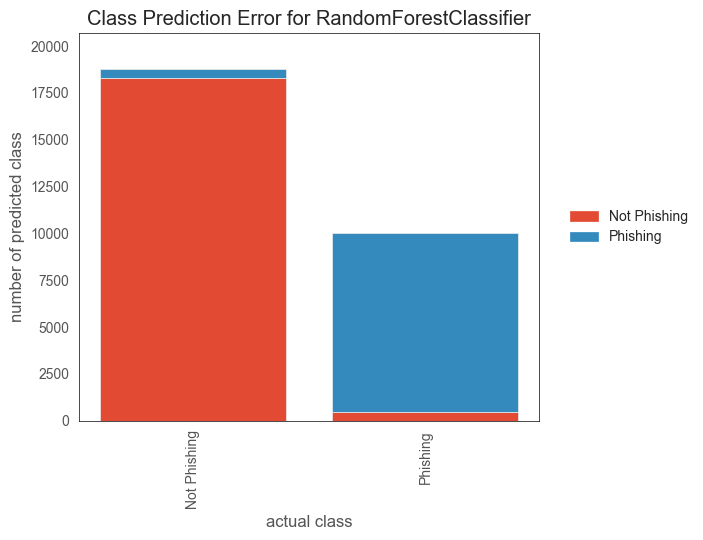

In [64]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'})
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

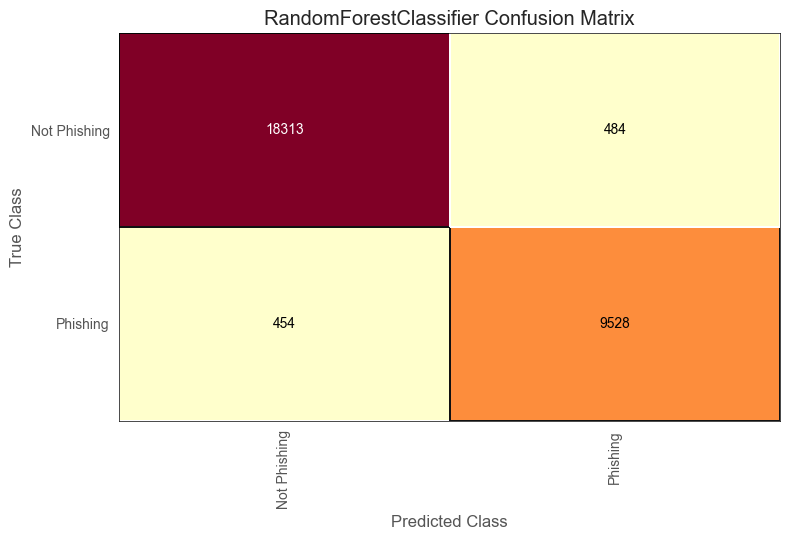

In [66]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'})
cm.score(X_test, y_test)
cm.show()
plt.show()

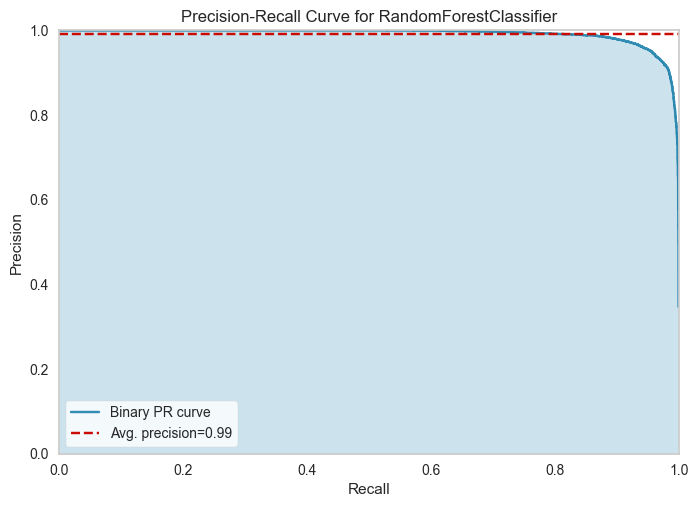

In [45]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(rfc)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

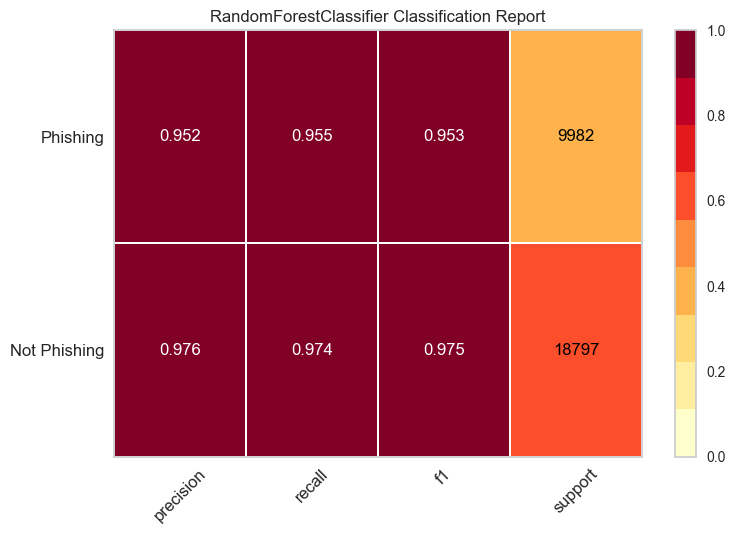

In [46]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'}, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

In [47]:
X_train.head(3)

,qty_at_url,qty_percent_url,url_shortened,qty_tld_url,qty_hyphen_domain,tls_ssl_certificate,domain_spf,qty_redirects,qty_ip_resolved,qty_hyphen_params,...,qty_dot_url,qty_vowels_domain,time_domain_expiration,qty_hyphen_url,time_response,asn_ip,ttl_hostname,qty_dot_domain,time_domain_activation,qty_slash_url
64008,0,0,0,1,0,1,1,0,1,-1,...,4,8,334,0,0.469236,20013,14388,3,2952,2
3635,0,0,0,1,0,1,-1,1,1,-1,...,5,5,198,1,0.086699,197695,13069,1,531,3
87571,0,0,0,1,0,0,1,2,1,-1,...,2,5,294,0,0.625018,46606,14389,2,3722,0


In [48]:
X_train.dtypes

qty_at_url                  int64
qty_percent_url             int64
url_shortened               int64
qty_tld_url                 int64
qty_hyphen_domain           int64
tls_ssl_certificate         int64
domain_spf                  int64
qty_redirects               int64
qty_ip_resolved             int64
qty_hyphen_params           int64
qty_slash_params            int64
qty_underline_url           int64
qty_nameservers             int64
qty_equal_url               int64
qty_percent_params          int64
qty_mx_servers              int64
qty_dot_url                 int64
qty_vowels_domain           int64
time_domain_expiration      int64
qty_hyphen_url              int64
time_response             float64
asn_ip                      int64
ttl_hostname                int64
qty_dot_domain              int64
time_domain_activation      int64
qty_slash_url               int64
dtype: object

In [49]:
import pickle

with open('model_pkl', 'wb') as files:
    pickle.dump(rfc, files)